# 1. Packages

In [1]:
# numpy - scientific computing with Python
# matplotlib - plot graphs in Python
# sklearn provides simple and efficient tools for data mining and data analysis.
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model

from testCases_v2 import *
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline

# np.random.seed(1)

# 2. Data Loading

X is <class 'numpy.ndarray'>
X has a size of (2, 400)
Y is <class 'numpy.ndarray'>
Y has a size of (1, 400)
Y.ravel() has a size of (400,)


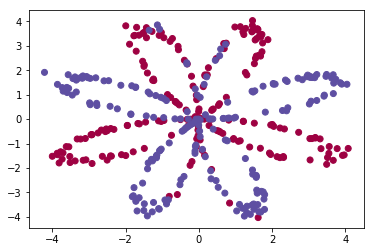

In [2]:
X, Y = load_planar_dataset() # X is data, Y is label
print("X is " + str(type(X)))
print("X has a size of " + str(X.shape))
print("Y is " + str(type(Y)))
print("Y has a size of " + str(Y.shape))
print("Y.ravel() has a size of " + str(Y.ravel().shape))

# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y.ravel(), cmap=plt.cm.Spectral) # Y.ravel() turns ndarray to a one-rank array 

In [3]:
# Get the size of X, Y and the number of examples
shape_X = X.shape
shape_Y = Y.shape
m = shape_X[1]

print("We have in total %d examples" %m)

We have in total 400 examples


# 3. Building Helper Functions
<img src="images/classification_kiank.png" style="width:600px;height:300px;">

For one example $x^{(i)}$:
$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1]}\tag{1}$$ 
$$a^{[1] (i)} = \tanh(z^{[1] (i)})\tag{2}$$
$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2]}\tag{3}$$
$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})\tag{4}$$
$$y^{(i)}_{prediction} = \begin{cases} 1 & \mbox{if } a^{[2](i)} > 0.5 \\ 0 & \mbox{otherwise } \end{cases}\tag{5}$$

Given the predictions on all the examples, you can also compute the cost $J$ as follows: 
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{6}$$


## 3.1 Defining the NN Structure

(This step is not included in a simple Logistic Regression model.)

In [4]:
def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (number of features, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- the size of hidden layer
    
    Returns:
    n_x -- the size of input layer
    n_h -- the size of hidden layer
    n_y -- the size of output layer
    """
    n_x = X.shape[0]
    n_h = 4 # default size of hidden layer is 4
    n_y = Y.shape[0]
    
    return(n_x, n_h, n_y)

In [5]:
X_assess, Y_assess = layer_sizes_test_case()
(n_x, n_h, n_y) = layer_sizes(X_assess, Y_assess)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 5
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 2


## 3.2 Initialize the Model's Parameters

(Make sure that the weights are randomly initialized.)

In [6]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Arguments:
    n_x -- the size of input layer
    n_h -- the size of hidden layer
    n_y -- the size of output layer
    
    Returns:
    params -- dictionary containing:
                W1 -- weight matrix of shape (n_h, n_x)
                b1 -- bias vector of shape (n_h, 1)
                W2 -- weight matrix of shape (n_y, n_h)
                b2 -- bias vector of shape (n_y, 1)
    """
    # np.random.seed(2)
    
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    
    params = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2
    }
    
    return params

In [7]:
n_x, n_h, n_y = initialize_parameters_test_case()

parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.01144724  0.00901591]
 [ 0.00502494  0.00900856]
 [-0.00683728 -0.0012289 ]
 [-0.00935769 -0.00267888]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[ 0.00530355 -0.00691661 -0.00396754 -0.00687173]]
b2 = [[0.]]


## 3.3 Forward Propagation

In [8]:
def forward_propagation(X, params):
    """
    Arguments:
    X -- input dataset of shape (number of features, number of examples)
    params -- dictionary containing:
                W1 -- weight matrix of shape (n_h, n_x)
                b1 -- bias vector of shape (n_h, 1)
                W2 -- weight matrix of shape (n_y, n_h)
                b2 -- bias vector of shape (n_y, 1)
                
    Returns:
    A2 -- sigmoid output of the second activation
    cache -- dictionary containing:
                Z1 -- (n_h, number of examples)
                A1 -- (n_h, number of examples)
                Z2 -- (n_y, number of examples)
                A2 -- (n_y, number of examples)
    """
    # Retrieve parameters from params
    W1 = params["W1"]
    b1 = params["b1"]
    W2 = params["W2"]
    b2 = params["b2"]
    
    # Calculate Z1, A1, Z2 and A2
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1) # Use tanh as the first activation function
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    cache = {
        "Z1": Z1,
        "A1": A1,
        "Z2": Z2,
        "A2": A2
    }
    
    return A2, cache

In [9]:
X_assess, parameters = forward_propagation_test_case()
A2, cache = forward_propagation(X_assess, parameters)

# Note: we use the mean here just to make sure that your output matches ours. 
print(np.mean(cache['Z1']) ,np.mean(cache['A1']),np.mean(cache['Z2']),np.mean(cache['A2']))

0.26281864019752443 0.09199904522700109 -1.3076660128732143 0.21287768171914198


## 3.4 Compute Costs

$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large{(} \small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)} \small\tag{6}$$

In [10]:
def compute_cost(A2, Y, params):
    """
    Compute the cross-entropy cost.
    
    Arguments:
    A2 -- sigmoid output of the second activation
    Y -- labels of shape (1, number of examples)
    params -- dictionary containing:
                W1 -- weight matrix of shape (n_h, n_x)
                b1 -- bias vector of shape (n_h, 1)
                W2 -- weight matrix of shape (n_y, n_h)
                b2 -- bias vector of shape (n_y, 1)
    
    Returns:
    cost -- cross-entropy cost
    """
    m = Y.shape[1]
    
    logprobs1 = -np.dot(Y, np.log(A2).T)
    logprobs2 = -np.dot(1-Y, np.log(1-A2).T)
    cost = 1/m * (logprobs1 + logprobs2)
    
    cost = np.asscalar(cost)
    return cost

In [11]:
A2, Y_assess, parameters = compute_cost_test_case()

print("cost = " + str(compute_cost(A2, Y_assess, parameters)))

cost = 0.6930587610394646


## 3.5 Backward Propagation

<img src="images/grad_summary.png" style="width:600px;height:300px;">

(Remind that if the first activation function is **tanh**, then $g^{[1]'}(z) = 1-a^2$ for $a = g^{[1]}(z)$.)

In [12]:
def backward_propagation(params, cache, X, Y):
    """
    Arguments:
    params -- dictionary containing:
                W1 -- weight matrix of shape (n_h, n_x)
                b1 -- bias vector of shape (n_h, 1)
                W2 -- weight matrix of shape (n_y, n_h)
                b2 -- bias vector of shape (n_y, 1)
    cache -- dictionary containing:
                Z1 -- (n_h, number of examples)
                A1 -- (n_h, number of examples)
                Z2 -- (n_y, number of examples)
                A2 -- (n_y, number of examples)
    X -- input dataset of shape (number of features, number of examples)
    Y -- labels of shape (1, number of examples)
    
    Returns:
    grads -- dictionary containing the gradients dW1, db1, dW2 and db2
    """
    m = X.shape[1]
    
    W1 = params["W1"]
    W2 = params["W2"]
    
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    # Backward propagation
    dZ2 = A2 - Y
    dW2 = 1/m * np.dot(dZ2, A1.T)
    db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = 1/m * np.dot(dZ1, X.T)
    db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {
        "dW1": dW1,
        "db1": db1,
        "dW2": dW2,
        "db2": db2
    }
    
    return grads

In [13]:
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()

grads = backward_propagation(parameters, cache, X_assess, Y_assess)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 0.00301023 -0.00747267]
 [ 0.00257968 -0.00641288]
 [-0.00156892  0.003893  ]
 [-0.00652037  0.01618243]]
db1 = [[ 0.00176201]
 [ 0.00150995]
 [-0.00091736]
 [-0.00381422]]
dW2 = [[ 0.00078841  0.01765429 -0.00084166 -0.01022527]]
db2 = [[-0.16655712]]


## 3.6 Updating Parameters

In [14]:
def update_parameters(params, grads, learning_rate = 1.2):
    """
    Arguments:
    params -- dictionary containing:
                W1 -- weight matrix of shape (n_h, n_x)
                b1 -- bias vector of shape (n_h, 1)
                W2 -- weight matrix of shape (n_y, n_h)
                b2 -- bias vector of shape (n_y, 1)
    grads -- dictionary containing the gradients dW1, db1, dW2 and db2
    learning_rate -- learning rate
    
    Returns:
    params -- dictionary contraining updated parameters
    """
    W1 = params["W1"]
    b1 = params["b1"]
    W2 = params["W2"]
    b2 = params["b2"]
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    # Update rule for each parameter
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    params = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2
    }
    return params

In [15]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[0.00010457]]


## 3.7 Predictions

In [16]:
def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    params -- parameters learnt by the model, containing W1, b1, W2 and b2
    X -- input data of size (n_x, m)
    
    Returns:
    predictions -- vector of predictions of the model (red: 0 / blue: 1)
    """
    A2, cache = forward_propagation(X, parameters)

    predictions = (A2 > 0.5)
    
    return predictions

In [17]:
parameters, X_assess = predict_test_case()

predictions = predict(parameters, X_assess)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.6666666666666666


# 4. Merge all Functions into a Model

In [18]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost = False):
    """
    Arguments:
    X -- input dataset of shape (number of features, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- the size of hidden layer
    num_iterations -- number of iterations
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    params -- parameters learnt by the model, containing W1, b1, W2 and b2
    """
    # np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    m = X.shape[1]
    print("The input size is " + str(n_x))
    print("The output size is " + str(n_y))
    
    params = initialize_parameters(n_x, n_h, n_y)
    costs = [] # initialize the list of costs
    
    for i in range(num_iterations):
        A2, cache = forward_propagation(X, params)
        cost = compute_cost(A2, Y, params)
        costs.append(cost)
        grads = backward_propagation(params, cache, X, Y)
        params = update_parameters(params, grads)
        
        if print_cost and (not i % 1000):
            print("Cost after iteration %i: %f" %(i, cost))
    
    predictions = predict(params, X)
    return params, predictions, costs

In [19]:
# For test
X_assess, Y_assess = nn_model_test_case()
parameters, predictions, costs = nn_model(X_assess, Y_assess, 4, num_iterations=10000, print_cost=True)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

The input size is 2
The output size is 1
Cost after iteration 0: 0.693084
Cost after iteration 1000: 0.000217
Cost after iteration 2000: 0.000107
Cost after iteration 3000: 0.000071
Cost after iteration 4000: 0.000053
Cost after iteration 5000: 0.000042
Cost after iteration 6000: 0.000035
Cost after iteration 7000: 0.000030
Cost after iteration 8000: 0.000026
Cost after iteration 9000: 0.000023
W1 = [[-0.77804694  1.43766925]
 [-0.62254251  1.14275004]
 [-0.64615563  1.20452464]
 [-0.73479062  1.34950487]]
b1 = [[0.37058188]
 [0.26244635]
 [0.28679993]
 [0.34009529]]
W2 = [[-3.48791821 -2.17403916 -2.393282   -3.04416918]]
b2 = [[0.21161796]]


# 5. Deal with the Problem with the Model

The input size is 2
The output size is 1
Cost after iteration 0: 0.693146
Cost after iteration 1000: 0.261722
Cost after iteration 2000: 0.239419
Cost after iteration 3000: 0.230657
Cost after iteration 4000: 0.225401
Cost after iteration 5000: 0.221760
Cost after iteration 6000: 0.219042
Cost after iteration 7000: 0.220720
Cost after iteration 8000: 0.219406
Cost after iteration 9000: 0.218507
Accuracy: 90 % (percentage of correctly labelled data)


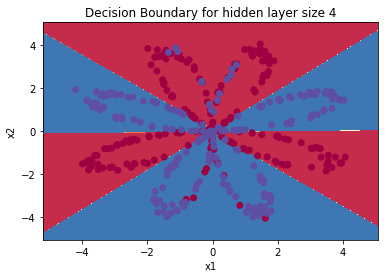

In [20]:
# Build a model with a n_h-dimensional hidden layer
parameters, predictions, costs = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))
print ('Accuracy: %d ' 
       % float((np.dot(Y,predictions.T) + np.dot(1-Y,(1-predictions).T))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled data)")

# 6. Other Problems

## 6.1 Other Input Data

The input size is 2
The output size is 1
Cost after iteration 0: 0.693162
Cost after iteration 1000: 0.093041
Cost after iteration 2000: 0.072276
Cost after iteration 3000: 0.068228
Cost after iteration 4000: 0.066095
Cost after iteration 5000: 0.064711
Cost after iteration 6000: 0.063697
Cost after iteration 7000: 0.062879
Cost after iteration 8000: 0.062145
Cost after iteration 9000: 0.063038
Accuracy: 97 % (percentage of correctly labelled data)


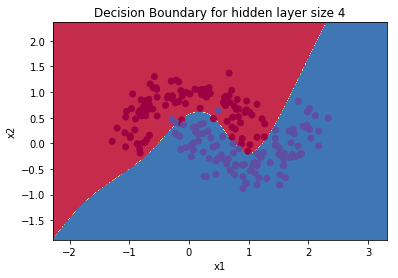

In [21]:
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

X, Y = noisy_moons
X = X.T
Y = Y.reshape((1, X.shape[1]))

parameters, predictions, costs = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))
print ('Accuracy: %d ' 
       % float((np.dot(Y,predictions.T) + np.dot(1-Y,(1-predictions).T))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled data)")

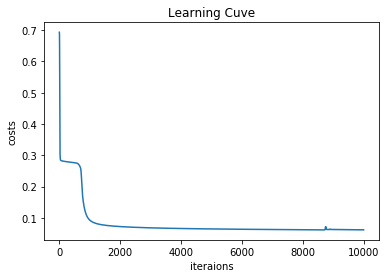

The final cost is 0.061862


In [22]:
# Plot costs
plt.plot(costs)
plt.xlabel("iteraions")
plt.ylabel("costs")
plt.title("Learning Cuve")
plt.show()
print("The final cost is %f" %costs[-1])

## 6.2 Compare with Different Size of Hidden Layer